In [1]:
using Pkg; Pkg.activate(".")

  Activating project at `~/Documents/Julia/Dev/RandomBattles.jl/example`


In [2]:
Pkg.develop(url="/home/its/Documents/Julia/Dev/RandomBattles.jl");
#Pkg.add("BenchmarkTools")
#Pkg.add("StatProfilerHTML")
#Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/Documents/Julia/Dev/RandomBattles.jl/example/Project.toml`
  No Changes to `~/Documents/Julia/Dev/RandomBattles.jl/example/Manifest.toml`


In [3]:
using Revise
using RandomBattles, BenchmarkTools, StatProfilerHTML

┌ Info: Precompiling RandomBattles [02d78f1d-6942-4113-b550-739f20f5c505]
└ @ Base loading.jl:1504


In [4]:
static_state1 = StaticState(("lanturn", "dragonair", "froslass", "azumarill", "sableye", "marowak_alolan"))
dynamic_state1 = DynamicState(static_state1)
static_state2 = StaticState(("azumarill", "sableye", "marowak_alolan", "lanturn", "dragonair", "froslass"))
dynamic_state2 = DynamicState(static_state2);

In [5]:
@benchmark battle_scores(d, s, 1000) setup = (d = dynamic_state1; s = static_state1)

BenchmarkTools.Trial: 429 samples with 1 evaluation.
 Range (min … max):  10.903 ms …  17.874 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     11.299 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   11.635 ms ± 854.459 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

    ▃█▄▂                                                        
  ▄██████▆▆▄▅▃▅▄▃▄▅▄▃▃▃▃▃▃▁▃▃▂▃▂▃▂▂▂▃▂▂▁▂▃▂▁▂▁▁▃▁▂▃▂▂▁▁▁▂▁▂▂▁▂ ▃
  10.9 ms         Histogram: frequency by time         14.7 ms <

 Memory estimate: 221.38 KiB, allocs estimate: 13661.

In [6]:
#@profilehtml battle_scores(dynamic_state1, static_state1, 1_000)

In [7]:
#SM(dynamic_state1, static_state1, 30)

In [8]:
#@benchmark SM(dynamic_state1, static_state1, 30)

In [9]:
#SM(dynamic_state2, static_state2, 30)

In [10]:
#@benchmark SM(dynamic_state2, static_state2, 30)

In [11]:
#value, strat = solve_battle(dynamic_state2, static_state2, 30)

In [12]:
#using Plots, Plots.PlotMeasures
#plot_strategy(strat, static_state2)
#plot!(background=:transparent, foreground=:white, grid = false, left_margin=10mm)

In [52]:
strat = select_decisions_MCTS(dynamic_state1, static_state1)

Strategy(Tuple{UInt8, UInt8}[(0x06, 0x03), (0x03, 0x02), (0x02, 0x02), (0x03, 0x05), (0x02, 0x03), (0x03, 0x02), (0x02, 0x03), (0x03, 0x02), (0x02, 0x03), (0x03, 0x02)  …  (0x03, 0x03), (0x03, 0x02), (0x03, 0x02), (0x03, 0x03), (0x03, 0x02), (0x03, 0x02), (0x03, 0x03), (0x03, 0x02), (0x04, 0x02), (0x07, 0x02)], [0.40082309268827193, 0.44194861233696187, 0.441732379481343, 0.4388690221222869, 0.44044995217698674, 0.44021469280255604, 0.44014736582190395, 0.43988007574163684, 0.43958653400638914, 0.43927288018961697  …  0.6179930436477779, 0.6176138627008365, 0.6186795988442695, 0.668086018065434, 0.6218427145638561, 0.622271903217934, 0.6283532260879061, 0.6248815165876778, 0.6874063283115146, 0.6249749549188539], Tuple{Tuple{UInt16, UInt16, UInt16}, Tuple{UInt16, UInt16, UInt16}}[((0x00be, 0x007f, 0x0080), (0x00ba, 0x007c, 0x007e)), ((0x00be, 0x007f, 0x0080), (0x00ba, 0x007c, 0x007e)), ((0x00be, 0x007f, 0x0080), (0x00ba, 0x007c, 0x007e)), ((0x00be, 0x007f, 0x007b), (0x00b7, 0x007c, 0x0

In [34]:
BenchmarkTools.DEFAULT_PARAMETERS.seconds = 120
@benchmark RandomBattles.select_decision_MCTS(dynamic_state1, static_state1)

BenchmarkTools.Trial: 420 samples with 1 evaluation.
 Range (min … max):  224.175 ms … 359.276 ms  ┊ GC (min … max): 0.00% … 4.54%
 Time  (median):     283.328 ms               ┊ GC (median):    5.27%
 Time  (mean ± σ):   286.349 ms ±  23.391 ms  ┊ GC (mean ± σ):  5.53% ± 1.17%

                      ▇▃▁▁▆▁▃▅▅█▂▆▂▁▃▁ ▁▂▃ ▃   ▂     ▁           
  ▃▁▁▁▁▃▃▃▃▃▆▃▅▆▃▅▃▆█▅████████████████▇███▅█▅▅▆█▅▄▃▅▄█▁▅▇▃▄▁▃▃▅ ▅
  224 ms           Histogram: frequency by time          343 ms <

 Memory estimate: 121.35 MiB, allocs estimate: 2283466.

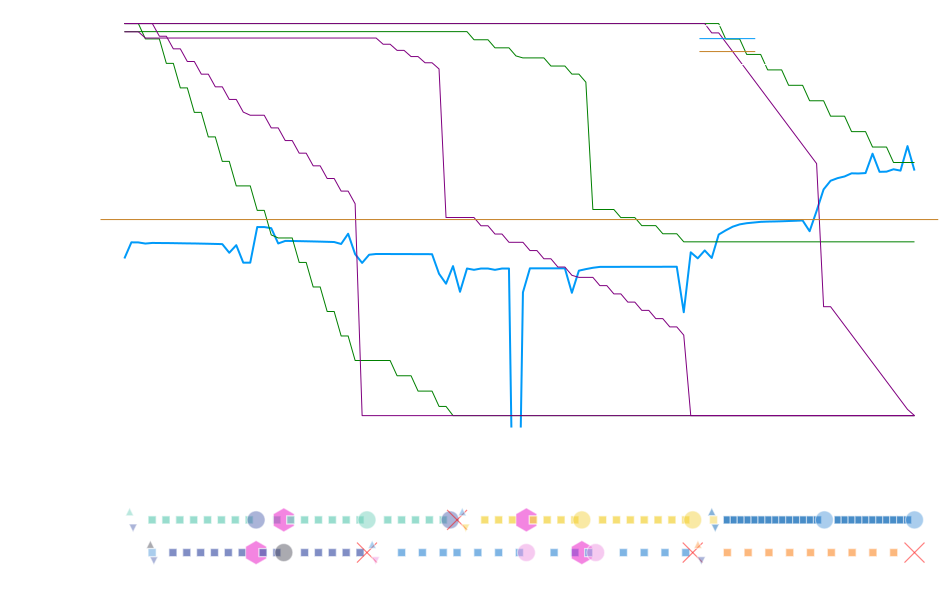

In [53]:
using Plots, Plots.PlotMeasures
plot_strategy(strat, static_state1)
plot!(background=:transparent, foreground=:white, grid = false, left_margin=10mm)

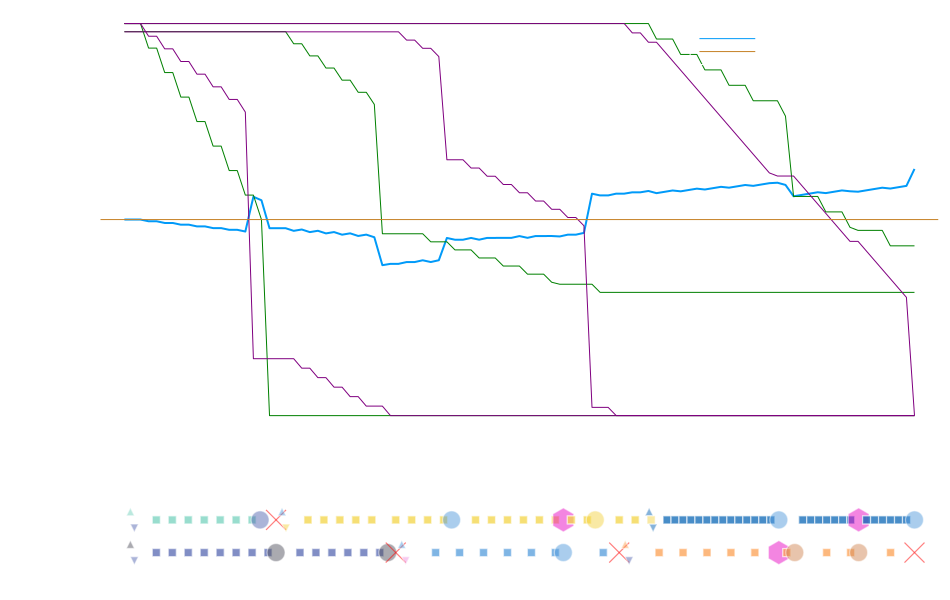

In [25]:
using Plots, Plots.PlotMeasures
plot_strategy(strat, static_state1)
plot!(background=:transparent, foreground=:white, grid = false, left_margin=10mm)